requirements.txt

In [50]:
import utils


Main

In [52]:
df = load_data()
df = feature_engineering(df)
df = custom_preprocess_data(df)
X_processed, pipeline = encodings_imputers(df)
processed_df = transform_output_to_df(X_processed, pipeline['preprocessor'], df)
processed_df.head()
processed_df.to_csv('processed_dataset_YUL-Flights-Weather.csv', index=False)

df = pd.read_csv('processed_dataset_YUL-Flights-Weather.csv')
df 


# # # drop estimated departure delay
# # df = df.drop(columns=['Estimated Departure Delay (min)'])

# # Split the data into features and target variable
# X_train, X_test, y_train, y_test = split_data(df, target_column='Departure Delay (min)')

# # Test and validate different models
# results = {}
# for name, model in models.items():
#     mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
#     results[name] = {'MSE': mse, 'R2': r2}
#     print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")




/var/folders/2t/c7s0z0zs4698zw0k9pj4f2r80000gn/T/ipykernel_97256/991693422.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = pd.cut(df['Scheduled Departure Time'].dt.month,
/var/folders/2t/c7s0z0zs4698zw0k9pj4f2r80000gn/T/ipykernel_97256/991693422.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekend Departure'] = df['Weekday of Departure'].isin(['Saturday', 'Sunday']).astype(int)
/var/folders/2t/c7s0z0zs4698zw0k9pj4f2r80000gn/T/ipykernel_97256/991693422.py:41: SettingWithCopyWa

LinearRegression - MSE: 0.31, R2: 0.64
RandomForestRegressor - MSE: 0.17, R2: 0.81
GradientBoostingRegressor - MSE: 0.17, R2: 0.80


In [56]:
# # Define the parameter grid for each model
# param_grids = {
#     'LinearRegression': {},
#     'RandomForestRegressor': {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     },
#     'GradientBoostingRegressor': {
#         'n_estimators': [100, 200, 300],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 5, 10]
#     },
#     'XGBRegressor': {
#         'n_estimators': [100, 200, 300],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 6, 9]
#     },
#     'SVR': {
#         'C': [0.1, 1, 10],
#         'gamma': ['scale', 'auto'],
#         'kernel': ['linear', 'rbf']
#     }
# }

# # Function to perform grid search and update the model with best parameters
# def grid_search_tuning(model, params, X_train, y_train):
#     grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     return grid_search.best_estimator_

# # Perform grid search for each model
# best_models = {}
# for name in models:
#     if param_grids[name]:  # Only perform grid search if there are parameters to tune
#         print(f"Grid searching for {name}")
#         best_models[name] = grid_search_tuning(models[name], param_grids[name], X_train, y_train)
#     else:
#         best_models[name] = models[name]  # For models without parameters, use the default

# # Create a super ensemble model with the best models
# super_ensemble = VotingRegressor(
#     estimators=[(name, model) for name, model in best_models.items()]
# )

# # Evaluate the super ensemble model
# mse, r2 = evaluate_model(super_ensemble, X_train, y_train, X_test, y_test)
# print(f"Super Ensemble - MSE: {mse:.2f}, R2: {r2:.2f}")

# # Update the models dictionary with the best models
# models.update(best_models)

Grid searching for RandomForestRegressor


Grid searching for GradientBoostingRegressor
Super Ensemble - MSE: 0.17, R2: 0.80


In [57]:
# save the model for deployment
import joblib
joblib.dump(super_ensemble, 'super_ensemble_model.pkl')
joblib.dump(models, 'models.pkl')
joblib.dump(pipeline, 'pipeline.pkl')

# Load the model and pipeline
model = joblib.load('super_ensemble_model.pkl')
pipeline = joblib.load('pipeline.pkl')

# Make predictions
predictions = model.predict(X_test)
predictions

# load the model and predict from model.pkl
import joblib
import pandas as pd



['pipeline.pkl']

In [66]:
# Make predictions
predictions = model.predict(instance)
predictions

# converting prediction to unscaled values


KeyError: 'target_encoders'

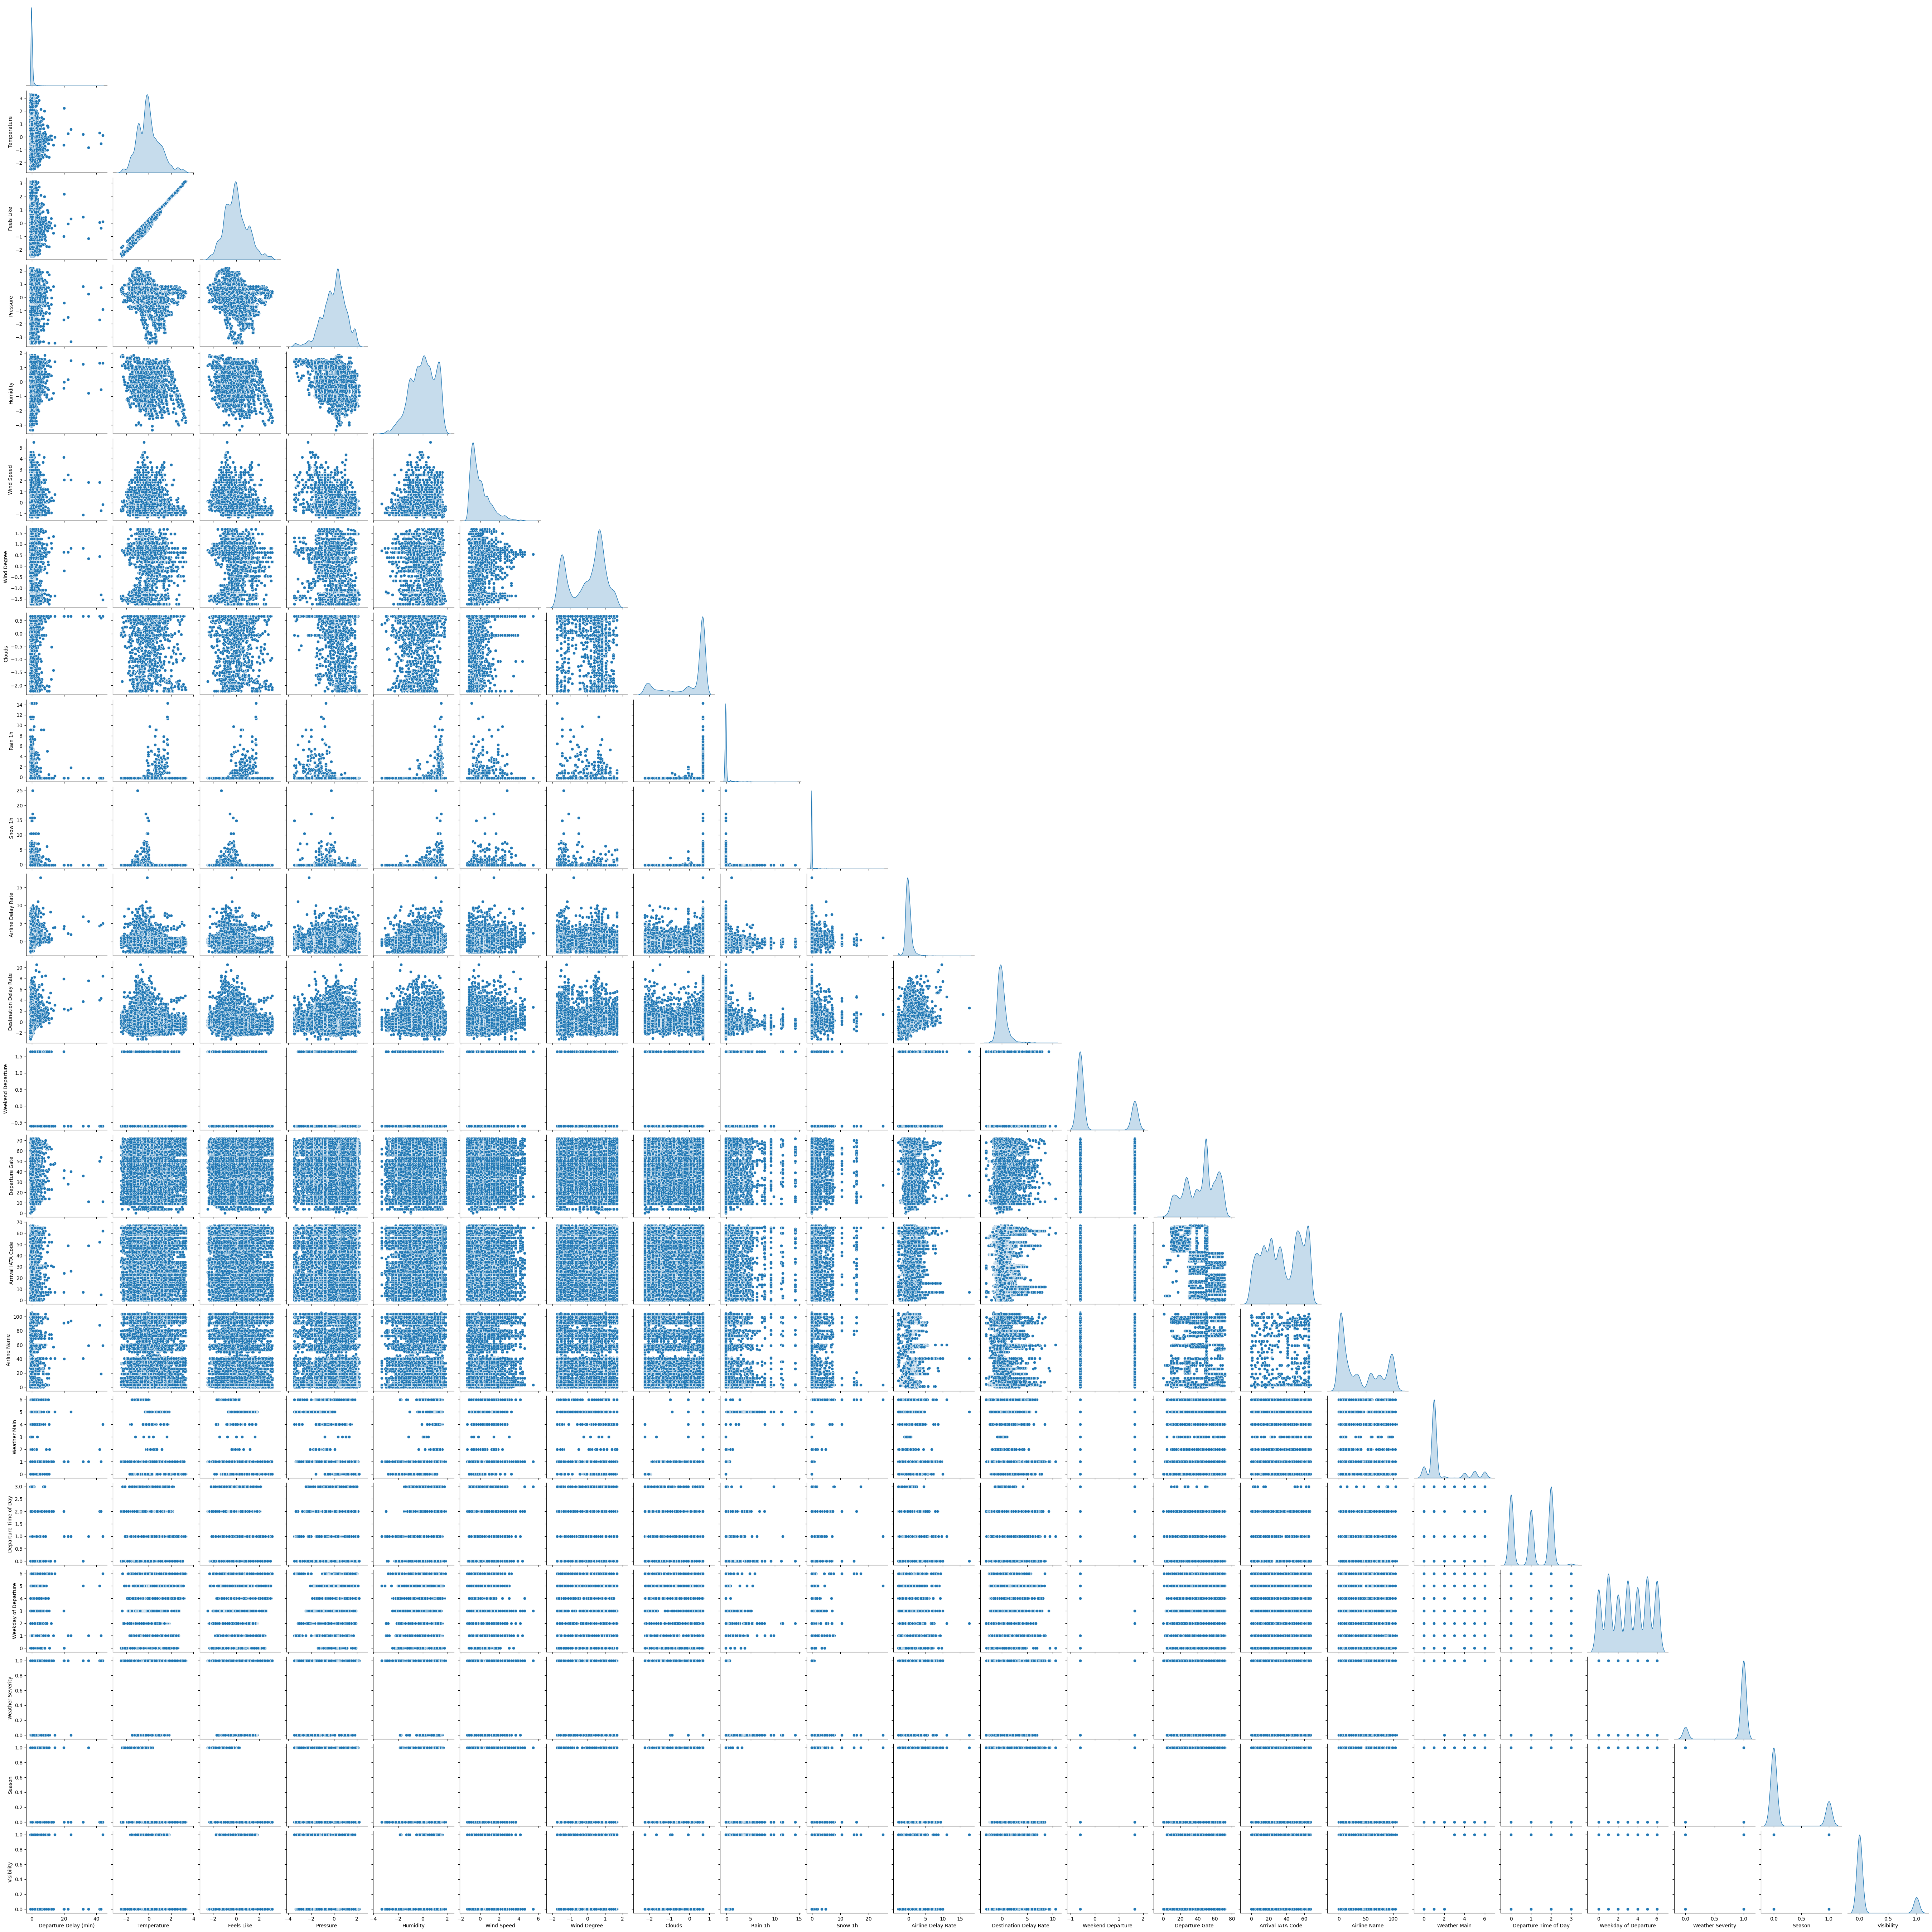

In [34]:
# # pairplot of all the features
# sns.pairplot(df, diag_kind='kde', corner=True)


<AxesSubplot: xlabel='Weekday of Departure', ylabel='Departure Delay (min)'>

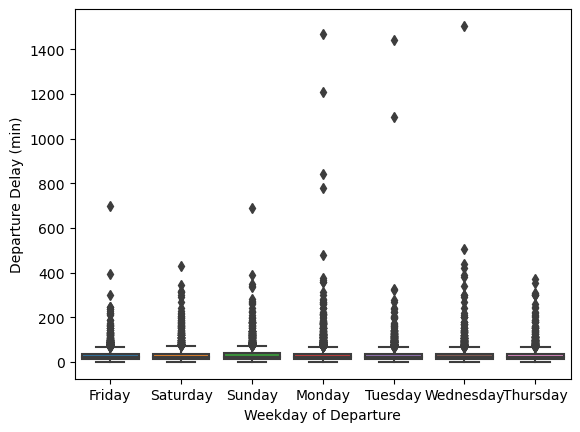

In [48]:
# # # number of flights by weekday
# # df['Weekday of Departure'].value_counts().plot(kind='bar')

# # plot weekday against departure delay
# sns.boxplot(x='Weekday of Departure', y='Departure Delay (min)', data=df)


In [58]:
# X_train

Temperature  Feels Like  Pressure  Humidity  Wind Speed  Wind Degree  \
8502     -1.009741   -1.294932 -0.726797  1.045540    1.638309    -1.450811   
10059    -0.429721   -0.409868  0.345926  0.519262   -0.325447    -1.517173   
18700    -1.021675   -1.020886  1.321129  1.308679   -0.263666     0.871861   
24520     1.972708    1.907336  0.833528 -1.147287   -0.921193     1.469119   
2046     -0.017978   -0.294160 -0.044155  0.519262    1.638309    -1.261205   
...            ...         ...       ...       ...         ...          ...   
19067     0.947529    1.080126 -0.434236  0.606975   -0.890302     1.544961   
14561    -0.737633   -0.569220 -0.044155 -0.445583   -0.722611     0.615893   
12712     0.294708   -0.042444 -0.824318 -0.796435    2.772433     0.824459   
8828     -0.251896   -0.497156 -0.434236  0.519262    1.183777    -1.640417   
21856     1.383140    1.417099 -1.799521  0.870114   -0.404879    -0.597585   

         Clouds   Rain 1h   Snow 1h  Airline Delay Rate  ...  \
8502   0.665242 -0.197819  2.951632           -0.096115  ...   
10059  0.347598 -0.197819 -0.179011            0.562578  ...   
18700  0.665242 -0.197819 -0.179011            8.292133  ...   
24520 -0.027800 -0.197819 -0.179011           -0.203657  ...   
2046   0.665242 -0.197819  5.797672            0.012343  ...   
...         ...       ...       ...                 ...  ...   
19067  0.665242 -0.197819 -0.179011           -0.143164  ...   
14561  0.376475 -0.197819 -0.179011            2.958740  ...   
12712  0.665242 -0.197819 -0.179011           -0.129722  ...   
8828   0.665242 -0.197819 -0.179011           -0.089394  ...   
21856  0.665242 -0.197819 -0.179011           -0.109558  ...   

       Weekend Departure  Departure Gate  Arrival IATA Code  Airline Name  \
8502            1.652753            68.0               15.0          73.0   
10059           1.652753            50.0               54.0           3.0   
18700          -0.605051            38.0                7.0          41.0   
24520          -0.605051            71.0               20.0           7.0   
2046           -0.605051            25.0               62.0          97.0   
...                  ...             ...                ...           ...   
19067          -0.605051            14.0               59.0          27.0   
14561           1.652753            62.0               29.0           4.0   
12712           1.652753            48.0                4.0          59.0   
8828           -0.605051            66.0               23.0          19.0   
21856           1.652753            55.0               15.0          73.0   

       Weather Main  Departure Time of Day  Weekday of Departure  \
8502            6.0                    0.0                   3.0   
10059           1.0                    2.0                   3.0   
18700           1.0                    0.0                   5.0   
24520           1.0                    0.0                   1.0   
2046            6.0                    2.0                   1.0   
...             ...                    ...                   ...   
19067           1.0                    2.0                   5.0   
14561           1.0                    1.0                   3.0   
12712           1.0                    1.0                   3.0   
8828            1.0                    2.0                   1.0   
21856           1.0                    2.0                   2.0   

       Weather Severity  Season  Visibility  
8502                0.0     1.0         1.0  
10059               1.0     0.0         0.0  
18700               1.0     1.0         0.0  
24520               1.0     0.0         0.0  
2046                0.0     0.0         1.0  
...                 ...     ...         ...  
19067               1.0     0.0         0.0  
14561               1.0     0.0         0.0  
12712               1.0     0.0         0.0  
8828                1.0     1.0         0.0  
21856               1.0     0.0         0

In [ ]:
# # function to get weather features from given date and time
# def get_weather_features(date, time, weather_df):
#     # Filter the weather data for the given date and time
#     mask = (weather_df['Date'] == date) & (weather_df['Time'] == time)
#     weather = weather_df[mask]
    
#     # If no data is found, return None
#     if weather.empty:
#         return None
    
#     # Otherwise, return the weather features
#     return weather.iloc[0]


In [64]:
# take an instance of X_test to predict
instance = X_test.iloc[0:1]
instance





Temperature  Feels Like  Pressure  Humidity  Wind Speed  Wind Degree  \
22637      0.57159    0.490421  0.931048  0.606975    0.274712     -0.12357   

         Clouds   Rain 1h   Snow 1h  Airline Delay Rate  ...  \
22637 -0.056676 -0.197819 -0.179011           -1.342926  ...   

       Weekend Departure  Departure Gate  Arrival IATA Code  Airline Name  \
22637          -0.605051            64.0               34.0          75.0   

       Weather Main  Departure Time of Day  Weekday of Departure  \
22637           1.0                    0.0                   5.0   

       Weather Severity  Season  Visibility  
22637               1.0     0.0         0.0  

[1 rows x 22 columns]

In [59]:
# save X_test and y_test
X_test.to_csv('X_test.csv', index=False)

In [87]:
X_test.columns

Index(['Temperature', 'Feels Like', 'Pressure', 'Humidity', 'Wind Speed',
       'Wind Degree', 'Clouds', 'Rain 1h', 'Snow 1h', 'Airline Delay Rate',
       'Destination Delay Rate', 'Estimated Departure Delay (min)',
       'Weekend Departure', 'Departure Gate', 'Arrival IATA Code',
       'Airline Name', 'Weather Main', 'Departure Time of Day',
       'Weekday of Departure', 'Weather Severity', 'Season', 'Visibility'],
      dtype='object')

In [91]:
Destination_Options = c['Arrival IATA Code'].unique().tolist()
Destination_Options = [x.upper() for x in Destination_Options]


AttributeError: 'numpy.ndarray' object has no attribute 'upper'

In [92]:
df

Departure Delay (min)  Temperature  Feels Like  Pressure  Humidity  \
0                  -0.177559    -0.589644   -0.451482  0.638487 -1.848992   
1                   0.120380    -0.589644   -0.451482  0.638487 -1.848992   
2                   2.563484    -0.589644   -0.451482  0.638487 -1.848992   
3                   0.030999    -0.589644   -0.451482  0.638487 -1.848992   
4                  -0.237147    -0.589644   -0.451482  0.638487 -1.848992   
...                      ...          ...         ...       ...       ...   
26855               0.835435    -2.130397   -2.138381 -0.239196  1.133253   
26856               1.818635    -1.917962   -2.067333 -0.239196 -1.147287   
26857              -0.862820    -1.756845   -1.930310 -0.239196 -0.357869   
26858               0.358732    -1.756845   -1.930310 -0.239196 -0.357869   
26859               0.239556    -1.583794   -1.783138 -0.239196  0.080696   

       Wind Speed  Wind Degree    Clouds   Rain 1h   Snow 1h  ...  \
0       -0.665243    -1.498213 -1.818158 -0.197819 -0.179011  ...   
1       -0.665243    -1.498213 -1.818158 -0.197819 -0.179011  ...   
2       -0.665243    -1.498213 -1.818158 -0.197819 -0.179011  ...   
3       -0.665243    -1.498213 -1.818158 -0.197819 -0.179011  ...   
4       -0.665243    -1.498213 -1.818158 -0.197819 -0.179011  ...   
...           ...          ...       ...       ...       ...  ...   
26855   -0.250427     0.502129 -0.489827 -0.197819 -0.179011  ...   
26856    0.954304     0.824459  0.665242 -0.197819 -0.179011  ...   
26857    1.183777     0.919262  0.665242 -0.197819 -0.179011  ...   
26858    1.183777     0.919262  0.665242 -0.197819 -0.179011  ...   
26859    0.954304     0.729656  0.665242 -0.197819 -0.179011  ...   

       Weekend Departure  Departure Gate  Arrival IATA Code  Airline Name  \
0              -0.605051            41.0               24.0           0.0   
1              -0.605051            43.0                4.0          31.0   
2              -0.605051            28.0               65.0          23.0   
3              -0.605051            39.0               65.0          72.0   
4              -0.605051            69.0               21.0           4.0   
...                  ...             ...                ...           ...   
26855          -0.605051            45.0               28.0          13.0   
26856           1.652753            50.0               65.0           3.0   
26857           1.652753            50.0               55.0          74.0   
26858           1.652753            50.0               53.0           3.0   
26859           1.652753            50.0               23.0           3.0   

       Weather Main  Departure Time of Day  Weekday of Departure  \
0               1.0                    1.0                   0.0   
1               1.0                    1.0                   0.0   
2               1.0                    1.0                   0.0   
3               1.0                    1.0                   0.0   
4               1.0                    1.0                   0.0   
...             ...                    ...                   ...   
26855           1.0                    1.0                   0.0   
26856           1.0                    0.0                   2.0   
26857           1.0                    0.0                   2.0   
26858           1.0                    0.0                   2.0   
26859           1.0                    1.0                   2.0   

       Weather Severity  Season  Visibility  
0                   1.0     1.0         0.0  
1                   1.0     1.0         0.0  
2                   1.0     1.0         0.0  
3                   1.0     1.0         0.0  
4                   1.0     1.0         0.0  
...                 ...     ...         ...  
26855               1.0     1.0         0.0  
26856               1.0     1.0         0.0  
26857               1.0     1.0         0.0  
26858               1.0     1.0         0.0  
26859

In [83]:
from utils import custom_preprocess_data


c = load_data()
# c = custom_preprocess_data(c)

# filter c to dates of last two weeks available

In [84]:
c.columns

Index(['Type', 'Status', 'Departure IATA Code', 'Departure Gate',
       'Departure Delay (min)', 'Scheduled Departure Time',
       'Estimated Departure Time', 'Actual Departure Time',
       'Arrival IATA Code', 'Arrival Terminal', 'Scheduled Arrival Time',
       'Estimated Arrival Time', 'Airline Name', 'Flight Number',
       'IATA Flight Number', 'Timestamp', 'Temperature', 'Feels Like',
       'Pressure', 'Humidity', 'Wind Speed', 'Wind Degree', 'Clouds',
       'Weather Main', 'Weather Description', 'Rain 1h', 'Snow 1h'],
      dtype='object')

In [85]:
# date range
c['Scheduled Departure Time'].min(), c['Scheduled Departure Time'].max()

('2023-09-30 20:00:00', '2024-02-01 18:00:00')

In [ ]:
# date options upto two weeks priot from 2024-02-01
date_options = pd.date_range(start='2024-01-18', end='2024-02-01', freq='D')

# unique airline values in the dataset


In [77]:
# !pip install branca==0.3.1 

  Attempting uninstall: branca
    Found existing installation: branca 0.7.0
    Uninstalling branca-0.7.0:
      Successfully uninstalled branca-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
folium 0.15.0 requires branca>=0.6.0, but you have branca 0.3.1 which is incompatible.


In [ ]:
# scale c['departure_delay'] to unscaled values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from folium import plugins
from geopy.distance import geodesic
import streamlit as st
import joblib
import datetime
import pipeline



def load_data():
    df = pd.read_csv('dataset_YUL-Flights-Weather.csv')
    return df


def custom_preprocess_data(df):
    # Convert Scheduled Departure Time and Estimated Departure Time to datetime
    df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])
    df['Estimated Departure Time'] = pd.to_datetime(df['Estimated Departure Time'])
    
    # # Calculate the difference in minutes
    # df['Estimated Departure Delay (min)'] = (df['Estimated Departure Time'] - df['Scheduled Departure Time']).dt.total_seconds() / 60

    # Calculate the time of day
    df['Departure Time of Day'] = pd.cut(df['Scheduled Departure Time'].dt.hour, 
                                     bins=[0, 6, 12, 18, 24], 
                                     labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
                                     right=False)

    # Weekday of departure
    df['Weekday of Departure'] = df['Scheduled Departure Time'].dt.day_name()

    # Calculate weather severity
    df['Weather Severity'] = np.where((df['Rain 1h'] > 0) | (df['Snow 1h'] > 0), 'Bad', 'Good')

    # Filter out destinations with a frequency less than 100
    destination_counts = df['Arrival IATA Code'].value_counts()
    destinations_to_keep = destination_counts[destination_counts >= 100].index
    df = df[df['Arrival IATA Code'].isin(destinations_to_keep)]

    # Feature engineering: Create a feature for season based on month
    df['Season'] = pd.cut(df['Scheduled Departure Time'].dt.month, 
                          bins=[0, 3, 6, 9, 12], 
                          labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                          right=False)

    # Feature engineering: Create a binary feature for weekend departure
    df['Weekend Departure'] = df['Weekday of Departure'].isin(['Saturday', 'Sunday']).astype(int)

    # Feature engineering: Create a feature for visibility based on weather conditions
    df['Visibility'] = np.where((df['Weather Main'].isin(['Fog', 'Mist', 'Haze', 'Snow', 'Rain'])), 'Low', 'High')

    # Drop unwanted columns
    df = df.drop(columns=['Type', 'Departure IATA Code', 'Scheduled Departure Time', 'Estimated Departure Time', 
    'Actual Departure Time', 'Arrival Terminal', 'Scheduled Arrival Time', 'Estimated Arrival Time', 'Flight Number',
    'IATA Flight Number', 'Timestamp', 'Weather Description'])
    
    # Filter rows where 'Status' is not 'active'
    df = df[df['Status'] == 'active']
    
    # Drop the 'Status' column as it's no longer needed
    df = df.drop(columns=['Status'])
    
    return df


def feature_engineering(df):
    # historical delay rate of airline in past 1 month
    df['Airline Delay Rate'] = df.groupby('Airline Name')['Departure Delay (min)'].transform(lambda x: x.rolling(30, 1).mean())
    # historical delay rate of destination in past 1 month
    df['Destination Delay Rate'] = df.groupby('Arrival IATA Code')['Departure Delay (min)'].transform(lambda x: x.rolling(30, 1).mean())

    return df

def encodings_imputers(df):

    # Define categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing for numerical data with KNNImputer
    numerical_transformer = Pipeline(steps=[
        ('imputer', KNNImputer(n_neighbors=5)),  # Using 5 neighbors for imputation
        ('scaler', StandardScaler())])
    
    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)])

    # Define the model preprocessing pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Apply the pipeline to the dataset
    X_processed = pipeline.fit_transform(df)
    
    return X_processed, pipeline

def get_feature_names_out(column_transformer):
    """Get output feature names for the given ColumnTransformer."""
    feature_names = []

    # Loop through each transformer within the ColumnTransformer
    for transformer_name, transformer, original_features in column_transformer.transformers_:
        if transformer_name == 'remainder':
            continue
        
        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer can generate feature names
            names = transformer.get_feature_names_out(original_features)
        else:
            # Otherwise, use the original feature names
            names = original_features
        
        feature_names.extend(names)
    
    return feature_names

def transform_output_to_df(X_processed, preprocessor, original_df):
    """Convert the output of the processing pipeline back to a pandas DataFrame."""
    feature_names = get_feature_names_out(preprocessor)
    processed_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed, 
                                columns=feature_names, 
                                index=original_df.index)
    return processed_df



def split_data(df, target_column, test_size=0.2, random_state=None):
    """
    Split the DataFrame into features (X) and target variable (y),
    then split them into training and testing sets.
    
    Parameters:
    df (DataFrame): The input DataFrame containing features and target variable.
    target_column (str): The name of the target column.
    test_size (float, optional): The proportion of the dataset to include in the test split.
    random_state (int, optional): Controls the shuffling applied to the data before splitting.
    
    Returns:
    X_train (DataFrame): Training features.
    X_test (DataFrame): Testing features.
    y_train (Series): Training target.
    y_test (Series): Testing target.
    """
    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2



# function to unscale the value
def unscale_target(scaled_value):
    mean = 28.95956813
    std = 33.56386877
    return scaled_value * std + mean

# df = load_data()
# df = feature_engineering(df)
# df = custom_preprocess_data(df)
# X_processed, pipeline = encodings_imputers(df)
# processed_df = transform_output_to_df(X_processed, pipeline['preprocessor'], df)
# processed_df.head()
# processed_df.to_csv('processed_dataset_YUL-Flights-Weather.csv', index=False)

# df = pd.read_csv('processed_dataset_YUL-Flights-Weather.csv')
# df 


def display_delay_prediction(unscaled_delay):
    
    if unscaled_delay > 60:
        message = "⛔️ Don't buy this flight by any chance. There is a strong likelihood of significant delay (> 1 hour)."
    elif 30 < unscaled_delay <= 60:
        message = "⚠️ Consider booking another flight. The delay for this flight is likely to be more than 30 minutes."
    elif 0 < unscaled_delay <= 30:
        message = "✈️ There will be some delay, but if the flight is significantly cheaper than other options, you can consider booking it. Expect a delay of approximately 0-30 minutes."
    else:
        message = "🛫 This flight is expected to be on time or may experience only a minimal delay. You can proceed with booking."

    st.write('The delay for this flight is', unscaled_delay, 'minutes.')
    st.write(message)


def get_coordinates(airport):
    geolocator = Nominatim(user_agent="flight_app")
    location = geolocator.geocode(airport)
    return location.latitude, location.longitude

def plot_flight_curve(origin, destination):
    origin_coords = montreal_coords = (45.5017, -73.5673)
    dest_coords = get_coordinates(destination)
    
    m = folium.Map(location=[origin_coords[0], origin_coords[1]], zoom_start=4)
    
    # Add markers for origin and destination
    folium.Marker(location=[origin_coords[0], origin_coords[1]], popup=origin).add_to(m)
    folium.Marker(location=[dest_coords[0], dest_coords[1]], popup=destination).add_to(m)
    
    # Plot flight curve
    points = [origin_coords, dest_coords]
    folium.PolyLine(locations=points, color='blue').add_to(m)
    
    return m


